###Portfolio project - Analysing Biodiversity in National Parks

The goal of this project is to intepret data from the National Parks Service about endangered species in different parks.

I will be performing data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyze, clean up and plot data as well as pose questions and seek to answer them in a meaningful way.

In [81]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [82]:
#Load the data into dataframes
obsdf = pd.read_csv('observations.csv')
specdf = pd.read_csv('species_info.csv')

print(obsdf.columns)
print(specdf.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [83]:
#Check datatypes
print(obsdf.dtypes)
print(specdf.dtypes)

scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [84]:
#Print summary statistics
obsdf.describe()
specdf.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [85]:
#Print a sample
print(specdf.sample(20))

               category                          scientific_name  \
5696     Vascular Plant                    Ranunculus hebecarpus   
5462     Vascular Plant           Carex aquatilis var. aquatilis   
3298     Vascular Plant                         Elodea nuttallii   
5189     Vascular Plant                     Trifolium variegatum   
1469     Vascular Plant       Asclepias incarnata ssp. incarnata   
3555     Vascular Plant                         Tonestus lyallii   
4684     Vascular Plant                        Piperia colemanii   
5505     Vascular Plant    Eleocharis acicularis var. acicularis   
1773     Vascular Plant  Croton glandulosus var. septentrionalis   
3533     Vascular Plant                  Stephanomeria runcinata   
5008     Vascular Plant                           Montia fontana   
2694  Nonvascular Plant              Bryum lisae var. cuspidatum   
4898     Vascular Plant                       Phacelia mutabilis   
3218               Bird                      Cat

In [86]:
#Categorial encoding - check value counts for observations
obsdf.value_counts()

scientific_name                      park_name                            observations
Poa compressa                        Great Smoky Mountains National Park  80              2
Salix exigua                         Yosemite National Park               186             2
Eleocharis palustris                 Great Smoky Mountains National Park  62              2
Potentilla norvegica                 Yosemite National Park               148             2
Spilogale putorius                   Yellowstone National Park            256             2
                                                                                         ..
Entodon sullivantii                  Yosemite National Park               165             1
                                     Yellowstone National Park            237             1
                                     Great Smoky Mountains National Park  64              1
                                     Bryce National Park                  85         

In [87]:
##Categorial encoding - check value counts for species
specdf.value_counts()

category        scientific_name         common_names                                       conservation_status
Amphibian       Anaxyrus canorus        Yosemite Toad                                      Threatened             1
Mammal          Sylvilagus bachmani     Brush Rabbit                                       Species of Concern     1
                Myotis lucifugus        Little Brown Myotis                                Species of Concern     1
                Myotis septentrionalis  Northern Long-Eared Bat, Northern Myotis           Threatened             1
                Myotis sodalis          Indiana Bat, Indiana Or Social Myotis              Endangered             1
                                                                                                                 ..
Bird            Pipilo chlorurus        Green-Tailed Towhee                                Species of Concern     1
                Piranga rubra           Summer Tanager                       

In [88]:
obsdf['observations'].value_counts()

84     220
85     210
91     206
92     203
95     202
      ... 
9        1
321      1
303      1
314      1
310      1
Name: observations, Length: 304, dtype: int64

In [89]:
merged_df = pd.merge(obsdf, specdf, on='scientific_name')

In [90]:
merged_df.value_counts()

scientific_name                park_name                            observations  category        common_names                                       conservation_status
Abies fraseri                  Bryce National Park                  109           Vascular Plant  Fraser Fir                                         Species of Concern     1
Oncorhynchus clarkii henshawi  Yosemite National Park               85            Fish            Lahontan Cutthroat Trout                           Threatened             1
Nycticorax nycticorax          Yellowstone National Park            206           Bird            Black-Crowned Night Heron                          Species of Concern     1
                                                                                                  Black-Crowned Night-Heron                          Species of Concern     1
                                                                    233           Bird            Black-Crowned Night Heron            

<AxesSubplot:xlabel='category', ylabel='observations'>

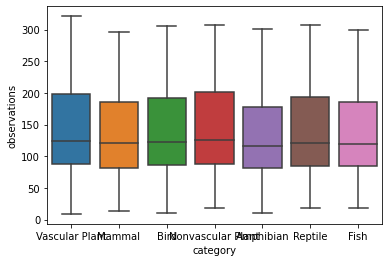

In [91]:
#Check category distribution
sns.boxplot(
    x='category',
    y='observations',
    data=merged_df
)

<AxesSubplot:xlabel='conservation_status', ylabel='observations'>

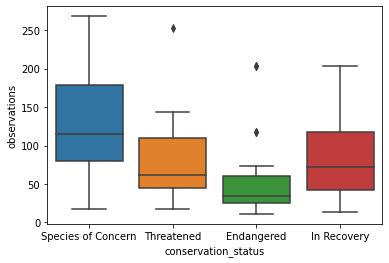

In [92]:
#Check conservation status distribution
sns.boxplot(
    x='conservation_status',
    y='observations',
    data=merged_df
)

In [93]:
merged_df.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


##Missing data

In [94]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None


In [95]:
dfConservation = merged_df.where(merged_df['conservation_status'].notnull())

In [96]:
print(dfConservation.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scientific_name      880 non-null    object 
 1   park_name            880 non-null    object 
 2   observations         880 non-null    float64
 3   category             880 non-null    object 
 4   common_names         880 non-null    object 
 5   conservation_status  880 non-null    object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB
None


In [97]:
print(dfConservation.sample(100))

      scientific_name park_name  observations category common_names  \
7074              NaN       NaN           NaN      NaN          NaN   
14203             NaN       NaN           NaN      NaN          NaN   
16283             NaN       NaN           NaN      NaN          NaN   
1539              NaN       NaN           NaN      NaN          NaN   
23117             NaN       NaN           NaN      NaN          NaN   
...               ...       ...           ...      ...          ...   
13756             NaN       NaN           NaN      NaN          NaN   
3247              NaN       NaN           NaN      NaN          NaN   
16520             NaN       NaN           NaN      NaN          NaN   
20508             NaN       NaN           NaN      NaN          NaN   
20712             NaN       NaN           NaN      NaN          NaN   

      conservation_status  
7074                  NaN  
14203                 NaN  
16283                 NaN  
1539                  NaN  
23117  

In [98]:
#Remove empty rows
merged_df.dropna(how='all', inplace=True)

In [99]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None
